## Notebook for experimenting with BruteForce algorithm

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean
import os

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
def parseParamsFromName(fileName):
    split = fileName.split("_")
    if len(split) is not 3 and len(split) is not 4:
        raise ValueError('Unexpected fileName: ' + fileName)
        
    if len(split) is 3:
        return split[0], split[1], split[2], 1
    else:
        return split[0], split[1], split[2], split[3]

In [3]:
def prepareDFCols(dirName, fileName):
    file_df = pd.read_csv(dirName + fileName)
    
    weightDist, priceWCorel, knapsackKapRatio, k = parseParamsFromName(fileName[:-4])
    
    file_df = file_df.assign(w_dist=weightDist)
    file_df = file_df.assign(c_w_corr=priceWCorel)
    file_df = file_df.assign(c_w_ratio=knapsackKapRatio)
    file_df = file_df.assign(k=k)
    
    return file_df

In [4]:
# load data from folder, create important columns and concat all files into 1 df
def loadDF(dirName):
    df = None
    
    for fileName in os.listdir(dirName):
        if df is None:
            df = prepareDFCols(dirName, fileName)
        else:
            df = pd.concat([df, prepareDFCols(dirName, fileName)], ignore_index=True)

    # make all ids positive
    df['KnapsackId'] = abs(df['KnapsackId'])
    return df

In [5]:
# load results.csv
res = pd.read_csv('results.csv')
for index, row in res.iterrows():
    weightDist, priceWCorel, knapsackKapRatio, k = parseParamsFromName(row['FileName'])
    res.loc[index, 'w_dist'] = weightDist
    res.loc[index, 'c_w_corr'] = priceWCorel
    res.loc[index, 'c_w_ratio'] = knapsackKapRatio
    res.loc[index, 'k'] = k
    
display(res.head())

,FileName,AlgoName,CpuTime,Date,w_dist,c_w_corr,c_w_ratio,k
0,bal_uni_001,BruteForce,0.125000,2020-11-13,bal,uni,001,1
1,heavy_strong_08,BruteForce,3.359375,2020-11-13,heavy,strong,08,1
2,bal_uni_025,BruteForce,0.140625,2020-11-13,bal,uni,025,1
3,light_strong_08,BruteForce,2.265625,2020-11-13,light,strong,08,1
4,bal_uni_05,BruteForce,1.375000,2020-11-13,bal,uni,05,1


In [6]:
# definice pouzitelnych promennych
ROOT_FOLDER_NAME = './Output/'
params_w = ['bal', 'light', 'heavy']
params_c = ['uni', 'corr', 'strong']
params_m = {
    0.01: '001',
    0.25: '025',
    0.5: '05',
    0.8: '08',
    1: '1'
}

bruteForce = 'BruteForce'
# bnb = 'BranchAndBound'
# greedy = 'Greedy'
# dp = 'DP_PD'

In [7]:
# ziskani pozadovanych dat
df = loadDF(ROOT_FOLDER_NAME + bruteForce + '/')
# filter res results
res = res[res['AlgoName'] == bruteForce]

display(df.head())

,KnapsackId,NumberOfItems,CpuTime,NodesVisited,Error,w_dist,c_w_corr,c_w_ratio,k
0,1,20,0.0,5,0.0,bal,corr,001,1
1,2,20,0.0,5,0.0,bal,corr,001,1
2,3,20,0.0,3,0.0,bal,corr,001,1
3,4,20,0.0,1,0.0,bal,corr,001,1
4,5,20,0.0,2,0.0,bal,corr,001,1


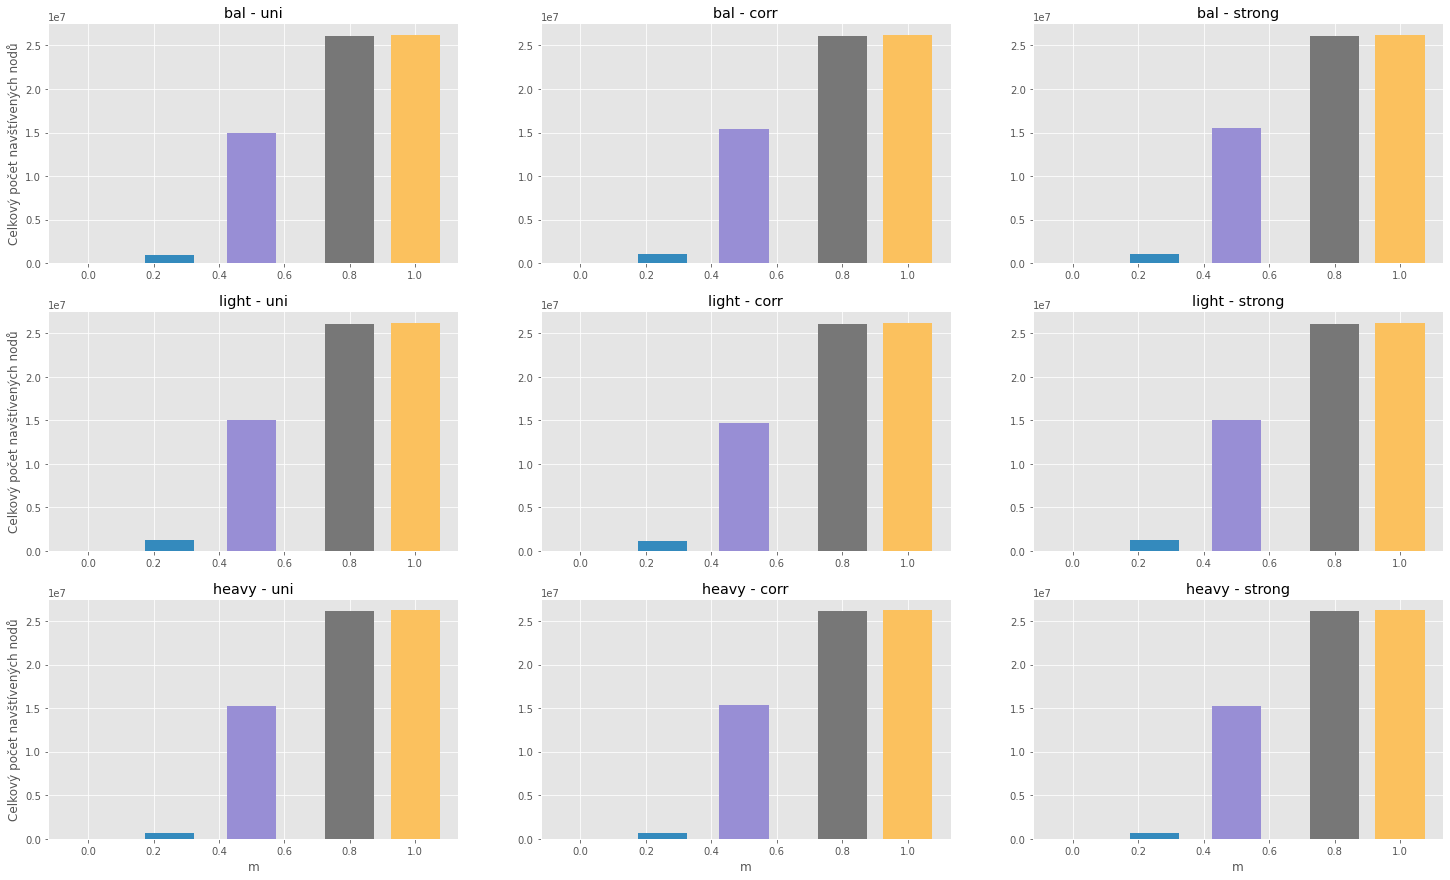

In [8]:
# plot pilot data
columnName = 'NodesVisited'
i = 331
plt.figure(figsize=(25,15))

for w in params_w:
    for c in params_c:
        plt.subplot(i)
        for m in params_m.keys():
            plt.bar(
                m,
                df[(df['w_dist'] == w) & (df['c_w_corr'] == c)
                   & (df['c_w_ratio'] == params_m[m]) & (df['k'] == 1)
                  ][columnName].sum(),
                width = 0.15
            )
        plt.title(w + ' - ' + c)
        if w is params_w[-1]:
            plt.xlabel('m')
        if c is params_c[0]:
            plt.ylabel('Celkový počet navštívených nodů')
        i += 1

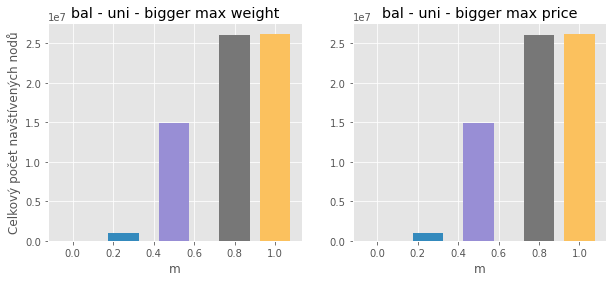

In [9]:
# bigger weight
columnName = 'NodesVisited'
i = 121
plt.figure(figsize=(10,4))

plt.subplot(i)
for m in params_m.keys():
    plt.bar(m,
            df[(df['w_dist'] == 'bal') & (df['c_w_corr'] == 'uni')
               & (df['c_w_ratio'] == params_m[m]) & (df['k'] == '099')
              ][columnName].sum(),
                width = 0.15
           )
plt.title('bal - uni - bigger max weight')
plt.xlabel('m')
plt.ylabel('Celkový počet navštívených nodů')
i += 1

# bigger price
plt.subplot(i)
for m in params_m.keys():
    plt.bar(m,
            df[(df['w_dist'] == 'bal') & (df['c_w_corr'] == 'uni')
               & (df['c_w_ratio'] == params_m[m]) & (df['k'] == '098')
              ][columnName].sum(),
            width = 0.15
           )
plt.title('bal - uni - bigger max price')
plt.xlabel('m')
plt.show()

In [10]:
print(np.linspace(0, 4, 6))
params_k = {
    0: '0',
    0.8: '08',
    1.6: '16',
    2.4: '24',
    3.2: '32',
    4: '4'
}

[0.  0.8 1.6 2.4 3.2 4. ]


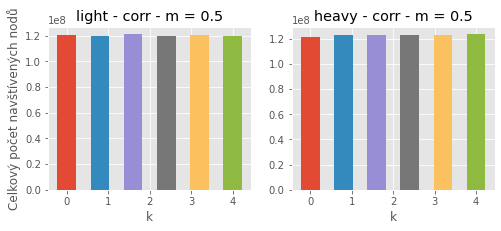

In [11]:
# big experiment data plotting
columnName = 'NodesVisited'
i = 121
plt.figure(figsize=(8,3))

for w in ['light', 'heavy']:
    plt.subplot(i)
    for k in params_k.keys():
        plt.bar(k,
                df[(df['w_dist'] == w) & (df['c_w_corr'] == 'corr')
                   & (df['c_w_ratio'] == '05') & (df['k'] == params_k[k])
                  ][columnName].sum(),
                width = 0.45
               )
    plt.title(w + ' - corr - m = 0.5')
    plt.xlabel('k')
    if w is 'light':
        plt.ylabel('Celkový počet navštívených nodů')
    i += 1

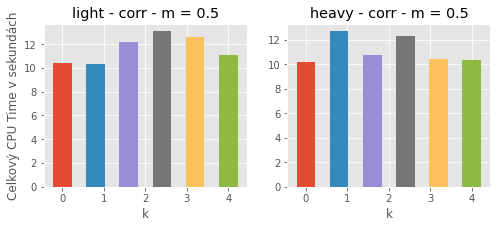

In [12]:
# big experiment data plotting - CPU
i = 121
plt.figure(figsize=(8,3))

for w in ['light', 'heavy']:
    plt.subplot(i)
    for k in params_k.keys():
        plt.bar(k,
                res[
                    (res['w_dist'] == w) & (res['c_w_corr'] == 'corr')
                    & (res['c_w_ratio'] == '05') & (res['k'] == params_k[k])
                ]['CpuTime'].sum(),
                width = 0.45
               )
    plt.title(w + ' - corr - m = 0.5')
    plt.xlabel('k')
    if w is 'light':
        plt.ylabel('Celkový CPU Time v sekundách')
    i += 1

In [13]:
# def getFinalTable(resCsv, df, folderName, algoName):
#     df_final = pd.DataFrame(columns=['n', 'Avg_Err', 'Avg_Cpu_Time', 'Max_Cpu', 'Max_Err', 'Total_CPU'])
#     if 'Error' not in df.columns:
#         df['Error'] = 0
#     for n in df.NumberOfItems.unique():
#         row_data = [
#             n,
#             df[df.NumberOfItems == n]['Error'].mean(),
#             resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime/len(df[df.NumberOfItems == n]),
#             df[df.NumberOfItems == n]['CpuTime'].max(),
#             df[df.NumberOfItems == n]['Error'].max(),
#             resCsv.loc[(resCsv['n'] == str(n)) & (resCsv['AlgoName'] == algoName) & (resCsv['folder'] == folderName)].iloc[0].CpuTime
#         ]
#         df_final.loc[len(df_final)] = row_data
#     return df_final

In [14]:
# df_bf_fin = getFinalTable(res, df_bf, fn, bruteForce)

# display(df_bf_fin.head(2))